*classify the Size_Categorie using SVM

* month	month of the year: 'jan' to 'dec'
*day	day of the week: 'mon' to 'sun'
*FFMC	FFMC index from the FWI system: 18.7 to 96.20
*MC	DMC index from the FWI system: 1.1 to 291.3
*DC	DC index from the FWI system: 7.9 to 860.6
*ISI	ISI index from the FWI system: 0.0 to 56.10
*temp	temperature in Celsius degrees: 2.2 to 33.30
*RH	relative humidity in %: 15.0 to 100
*wind	wind speed in km/h: 0.40 to 9.40
*rain	outside rain in mm/m2 : 0.0 to 6.4
*Size_Categorie 	the burned area of the forest ( Small , Large)

* Loaded the dataset for Forestfire
* There are 517 observations and 31 features
* Deleted the month and day columns as we have one hot encoded values for them in the table
* Now there are 517 observations and 29 features
* Did initial analysis on the data. There were no null values.
* Converted the target column 'size_category' into binary class using LabelEncoder
* Predictor variables = 28 input features = 'FFMC' to 'monthsep' 
* Target variable     = 1 feature = 'size_category'
* size_category = target variable
        small area = 1 -- fire in small area -- Not Burned Area 
        Large area = 0 -- fire in large area -- Burned Area


* Splitted the data using train_test_split
* Calculated the accuracy for linear kernel SVC
*   w/o scaled input  -- test Accuracy = 98%
    with scaled input -- test Accuracy = 96%

* Calculated the test accuracy for RBF kernel as well as Poly kernel
* Tweaked the RBF kernel for various C & gamma values
        
* Accuracy was highest for test data at 98% for Linear kernel
* Hence, we will select SVC Linear Kernel model.


In [16]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

In [3]:
ds = pd.read_csv('forestfires.csv')
ds

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
ds.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

<AxesSubplot:xlabel='size_category', ylabel='count'>

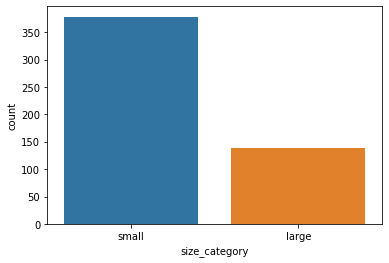

In [5]:
sns.countplot(ds['size_category'])

In [6]:
ds['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [7]:
#print(ds.shape)
#print(ds.dtypes)
#print(ds.isnull().sum())
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [8]:
ds.drop(['month', 'day'], axis=1, inplace=True)

In [9]:
ds

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


<AxesSubplot:xlabel='temp', ylabel='ISI'>

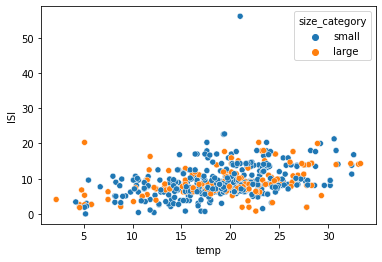

In [10]:
sns.scatterplot(x = 'temp', y='ISI', data=ds, hue='size_category')

* From the above graph it is seen that the probablity of fire in a small or large area 
* is almost negligible below 4 degree celcius

<AxesSubplot:xlabel='ISI', ylabel='FFMC'>

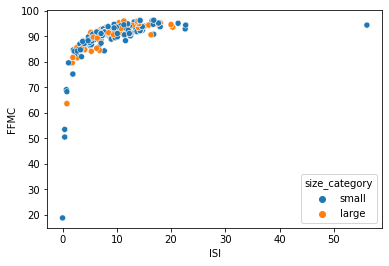

In [11]:
# ISI --  Initial Spread Index -- rate of fire spread
# ISI -- based on -- wind speed and FFMC
# FFMC -- Fine fuel moisture code
# FFMC -- low means -- wet
# FFMC -- high means -- dry
sns.scatterplot(x = 'ISI', y='FFMC', data=ds, hue='size_category')

* Inferences from the above graph:

* Fire in a large area is occuring only when FFMC is high(ie dry weather)
* When FFMC is low(ie. wet weather) the occurences of fire are negligible
* Fire spreads rapidly immediately after it has started

<AxesSubplot:xlabel='ISI', ylabel='wind'>

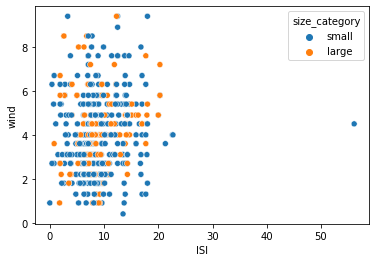

In [12]:
sns.scatterplot(x = 'ISI', y='wind', data=ds, hue='size_category')

<AxesSubplot:xlabel='FFMC', ylabel='DMC'>

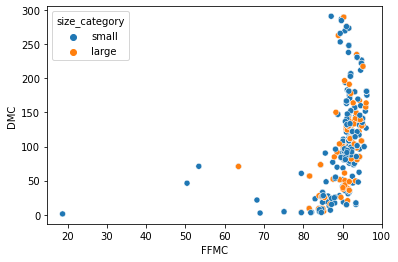

In [13]:
# 0 --fire in large area -- orange
# 1 --fire in small area -- blue
sns.scatterplot(x = 'FFMC', y='DMC', data=ds, hue='size_category')

* Inferences from the above graph:

* It is seen that when wind speed is greater than 1 km/hr fire spreads rapidly (both in small & large area)
* Fire spreads rapidly immediately after it has started (from ISI)

In [17]:
le = LabelEncoder()
ds['size_category'] = le.fit_transform(ds['size_category'])
ds.head(5)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


1    378
0    139
Name: size_category, dtype: int64


<AxesSubplot:xlabel='size_category', ylabel='count'>

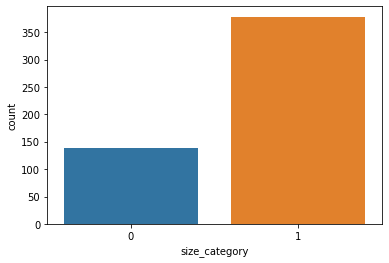

In [18]:
print(ds['size_category'].value_counts())
sns.countplot(ds['size_category'])
# small = 1, 
# large = 0

In [19]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [20]:
ds.describe(include='all')

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,0.731141
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,0.443796
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
x = ds.iloc[:,:-1]
y = ds[['size_category']]
print(y)
x

     size_category
0                1
1                1
2                1
3                1
4                1
..             ...
512              0
513              0
514              0
515              1
516              1

[517 rows x 1 columns]


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


## Linear Kernel

### Without Scaled input

Without Scaled input
Accuracy for Train data = 1.0
Accuracy for Test data = 0.9807692307692307


Text(33.0, 0.5, 'Actual')

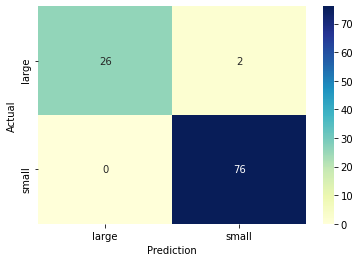

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
#print(x_train.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_test.shape)

#training the model
svc_model = SVC(kernel = 'linear')
svc_model.fit(x_train,y_train)

#testing the model
y_predict_train = svc_model.predict(x_train)
y_predict_test  = svc_model.predict(x_test)

print("Without Scaled input")
print("Accuracy for Train data =", accuracy_score(y_train,y_predict_train))
print("Accuracy for Test data =", accuracy_score(y_test,y_predict_test))

confu_matrix_test = confusion_matrix(y_test,y_predict_test)

#sns.heatmap(confu_matrix_test, annot=True, cmap='YlGnBu')
sns.heatmap(confu_matrix_test, annot=True, cmap='YlGnBu', xticklabels=['large','small'],
               yticklabels=['large','small'] )
plt.xlabel('Prediction')
plt.ylabel('Actual')

### With Scaled input

With scaled input
Accuracy for Train data = 0.891
Accuracy for Test data = 0.9615


Text(33.0, 0.5, 'Actual')

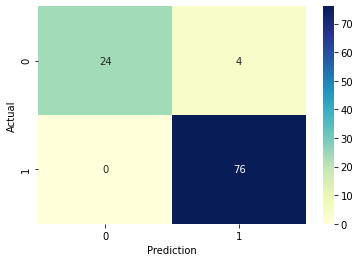

In [23]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 42, stratify = y)
#print(x_train.shape)
#print(x_test.shape)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # scaling train data
x_test_scaled  = scaler.fit_transform(x_test) # scaling test data
#print(x_train_scaled)
#print(x_test_scaled)

#training the model
svc_model = SVC(kernel = 'linear')
svc_model.fit(x_train_scaled,y_train)

#testing the model
y_predict_train_scaled = svc_model.predict(x_train_scaled)
y_predict_test_scaled  = svc_model.predict(x_test_scaled)

print("With scaled input")
print("Accuracy for Train data =",round(accuracy_score(y_train, y_predict_train_scaled),4))
print("Accuracy for Test data =", round(accuracy_score(y_test, y_predict_test_scaled),4))

confu_matrix_test_scaled = confusion_matrix(y_test,y_predict_test_scaled)

sns.heatmap(confu_matrix_test_scaled, annot=True, cmap='YlGnBu')
plt.xlabel('Prediction')
plt.ylabel('Actual')

## Kernel - polynomial - without scaled input


Without Scaled input
Accuracy for Train data = 0.7796610169491526
Accuracy for Test data = 0.75


Text(33.0, 0.5, 'Actual')

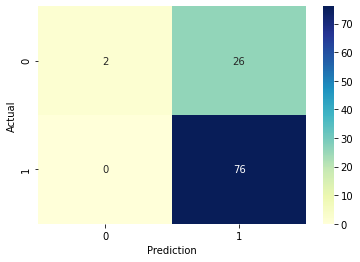

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
#print(x_train.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_test.shape)

#training the model
#svc_model = SVC(kernel = 'poly', degree=1) # behaves as linear kernel
svc_model = SVC(kernel = 'poly', degree=3)
svc_model.fit(x_train,y_train)

#testing the model
y_predict_train = svc_model.predict(x_train)
y_predict_test  = svc_model.predict(x_test)

print("Without Scaled input")
print("Accuracy for Train data =", accuracy_score(y_train,y_predict_train))
print("Accuracy for Test data =", accuracy_score(y_test,y_predict_test))

confu_matrix_test = confusion_matrix(y_test,y_predict_test)

sns.heatmap(confu_matrix_test, annot=True, cmap='YlGnBu')
plt.xlabel('Prediction')
plt.ylabel('Actual')

## Kernel -rbf - without scaled input

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
#print(x_train.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_test.shape)

#C is the cost of misclassification of training data
list_c     = [1,10,100,1000]
list_gamma = [0.2,0.02,1,100]

#training the model
accuracytable_svc = pd.DataFrame()
train_accuracy = []
test_accuracy  = []
c_val          = []
gamma_val      = [] 
for item in list_c:
    for item1 in list_gamma:
        c_val.append(item)
        gamma_val.append(item1)
        
        svc_model = SVC(kernel = 'rbf', C=item, gamma =item1)
        svc_model.fit(x_train,y_train)

        #testing the model
        y_predict_train = svc_model.predict(x_train)
        y_predict_test  = svc_model.predict(x_test)
         
        train_ac = round(accuracy_score(y_train,y_predict_train),4)
        test_ac  = round(accuracy_score(y_test,y_predict_test),4) 
        train_accuracy.append(train_ac)
        test_accuracy.append(test_ac)
       
    
accuracytable_svc['C']              = c_val 
accuracytable_svc['Gamma']          = gamma_val 
accuracytable_svc['Train Accuracy'] = train_accuracy    
accuracytable_svc['Test Accuracy']  = test_accuracy

print("Table for RBF Kernel Accuracy")
accuracytable_svc    

Table for RBF Kernel Accuracy


,C,Gamma,Train Accuracy,Test Accuracy
0,1,0.20,1.0000,0.7404
1,1,0.02,0.9952,0.7596
2,1,1.00,1.0000,0.7404
3,1,100.00,1.0000,0.7404
4,10,0.20,1.0000,0.7404
5,10,0.02,1.0000,0.7596
6,10,1.00,1.0000,0.7404
7,10,100.00,1.0000,0.7404
8,100,0.20,1.0000,0.7404
9,100,0.02,1.0000,0.7596


Train Accuracy =  0.9952
Test Accuracy = 0.7596


Text(33.0, 0.5, 'Actual')

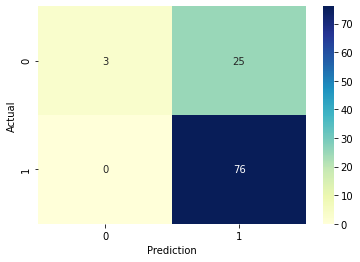

In [28]:
svc_model = SVC(kernel = 'rbf', C=1, gamma =0.02)
svc_model.fit(x_train,y_train)

#testing the model
y_predict_train = svc_model.predict(x_train)
y_predict_test  = svc_model.predict(x_test)
         
print("Train Accuracy = ",round(accuracy_score(y_train,y_predict_train),4))
print("Test Accuracy =",round(accuracy_score(y_test,y_predict_test),4))

confu_matrix_test = confusion_matrix(y_test,y_predict_test)

sns.heatmap(confu_matrix_test, annot=True, cmap='YlGnBu')
plt.xlabel('Prediction')
plt.ylabel('Actual')